# TAREA 1: Métodos de aprendizaje conjunto.

## 1. Preguntas conceptuales

### 1.1. ¿Si un algoritmo `gradient boosting ensemble` muestra `sobreajuste`, ¿debería aumentar o disminuir la tasa de aprendizaje? Argumente su respuesta.

**Respuesta:**

Se debería disminuir la tasa de aprendizaje.  El Gradient Boosting,  construye modelos secuenciales donde cada nuevo modelo corrige los errores del modelo anterior.  La tasa de aprendizaje afecta la velocidad con la que el modelo se ajusta a los datos. Si se disminuye la tasa de aprendizaje, cada nuevo  modelo efecta menos sobre la predicción final. por tanto el algoritmo hace correcciones más pequeñas en cada iteración es decir es mas gradual y controlado y disminuyendo el riesgo de sobreajuse.  

### 1.2. Si ha entrenado 5 `modelos diferentes` de clasificación con exactamente los mismos datos de entrenamiento y todos ellos alcanzan una exactitud (`accuracy`) del $95\%$, ¿existe alguna posibilidad de que pueda combinar estos modelos para obtener mejores resultados? Si es así, ¿cómo? Si no, ¿por qué?



**Respuesta:**
Sí es posible mejorar los resultados combinando los modelos, al ser metodos diferentes, los errores pueden ser diferentes y por tanto al combinarlos se complementan y se puede reducir el error total.

### 1.3. Suponga que en el escenario de la pregunta `1.2` se combinan los `5` clasificadores base medianyte el método de `voto mayoriatario duro`. Calcule el error del clasificador conjunto.

**Respuesta conceptual:**

El error del clasificador conjunto se calcula como la suma de la probabilidad de cada caso multiplicada por el error correspondiente a ese caso.

Para calcular el error del clasificador conjunto cuando se combinan 5 clasificadores mediante el método de voto mayoritario duro, necesitamos hacer algunas suposiciones sobre la independencia de los errores de los clasificadores. Si los errores de los clasificadores son independientes, podemos utilizar la probabilidad de que al menos 3 de los 5 clasificadores individuales clasifiquen incorrectamente una instancia.

Supongamos que cada clasificador tiene una exactitud del 95%, lo que significa que la probabilidad de error (incorrectamente clasificado) para cada clasificador individual es del 5% o 0.05.

La probabilidad de que al menos 3 de los 5 clasificadores clasifiquen incorrectamente una instancia se puede calcular utilizando la distribución binomial.

Para un número dado de clasificadores \( n = 5 \) y la probabilidad de error individual \( p = 0.05 \), la probabilidad de que exactamente \( k \) clasificadores cometan un error es:
$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$
Donde:
$$ \binom{n}{k} es\ el \ coeficiente \ binomial (combinaciones\ de \ n \ elementos\ tomados \ de \ k \ en \ k ).$$
$$ p \ es \ la \ probabilidad \ de \ error \ de \ un \ clasificador \ individual.$$
$$ ( 1 - p) \ es \ la \ probabilidad \ de \ que \ un \ clasificador \ individual \ clasifique \ correctamente.$$

Necesitamos calcular la probabilidad de que al menos 3 clasificadores cometan un error. Esto es igual a la suma de las probabilidades de que exactamente 3, 4, y 5 clasificadores cometan un error:

$$P(\text{ensemble error}) = P(X \geq 3) = P(X = 3) + P(X = 4) + P(X = 5)$$

Vamos a calcular estas probabilidades.

### Cálculo

1. Para \( k = 3 \):
$$P(X = 3) = \binom{5}{3} (0.05)^3 (0.95)^{2} $$

2. Para \( k = 4 \):
$$P(X = 4) = \binom{5}{4} (0.05)^4 (0.95)^{1} $$

3. Para \( k = 5 \):
$$ P(X = 5) = \binom{5}{5} (0.05)^5 (0.95)^{0}$$

Vamos a realizar estos cálculos en Python:

In [2]:
from math import comb

# Probabilidades individuales
p = 0.05
q = 1 - p

# Número de clasificadores
n = 5

# Cálculo de las probabilidades de error combinadas
P_X_3 = comb(n, 3) * (p**3) * (q**2)
P_X_4 = comb(n, 4) * (p**4) * (q**1)
P_X_5 = comb(n, 5) * (p**5) * (q**0)

# Probabilidad total de error del ensemble
P_ensemble_error = P_X_3 + P_X_4 + P_X_5

print("Probabilidad de que tres clasificadores fallen:", P_X_3)
print("Probabilidad de que cuatro clasificadores fallen:", P_X_4)
print("Probabilidad de que cinco clasificadores fallen:", P_X_5)
print("Probabilidad total de que 3 o mas de los 5 clasificadores fallen:", P_ensemble_error)

Probabilidad de que tres clasificadores fallen: 0.0011281250000000002
Probabilidad de que cuatro clasificadores fallen: 2.9687500000000007e-05
Probabilidad de que cinco clasificadores fallen: 3.125000000000001e-07
Probabilidad total de que 3 o mas de los 5 clasificadores fallen: 0.0011581250000000003


**ejemplo:**


In [10]:
# Importar librerías necesarias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar un conjunto de datos (por ejemplo, el conjunto de datos Iris)
data = load_iris()
X = data.data
y = data.target

X
y

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los cinco modelos base
modelo1 = DecisionTreeClassifier(max_depth=3, random_state=42)  # Árbol de decisión
modelo2 = SVC(probability=True, kernel='linear', random_state=42)  # Support Vector Classifier con kernel lineal
modelo3 = KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors
modelo4 = GaussianNB()  # Naive Bayes Gaussiano
modelo5 = LogisticRegression(max_iter=1000, random_state=42)  # Regresión logística

# Crear el Voting Classifier con voting='hard' (voto mayoritario duro)
votador = VotingClassifier(estimators=[
    ('decision_tree', modelo1),
    ('svc', modelo2),
    ('knn', modelo3),
    ('naive_bayes', modelo4),
    ('logistic_regression', modelo5)
], voting='hard')

# Ajustar el Voting Classifier a los datos de entrenamiento
votador.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
predicciones_conjunto = votador.predict(X_test)

# Calcular la exactitud del clasificador conjunto
exactitud = accuracy_score(y_test, predicciones_conjunto)
print(f'Exactitud del Voting Classifier: {exactitud:.2f}')

# Calcular el error del clasificador conjunto
error = 1 - exactitud
print(f'Error del clasificador conjunto: {error:.2f}')


Exactitud del Voting Classifier: 1.00
Error del clasificador conjunto: 0.00


In [5]:
# Evalua de forma individual 
modelos_base = {
    'Decision Tree': modelo1,
    'SVM': modelo2,
    'KNN': modelo3,
    'Naive Bayes': modelo4,
    'Logistic Regression': modelo5
}


for nombre, modelo in modelos_base.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    exactitud = accuracy_score(y_test, predicciones)
    error = 1 - exactitud
    print(f'{nombre} - Exactitud: {exactitud:.2f}, Error: {error:.2f}')

Decision Tree - Exactitud: 1.00, Error: 0.00
SVM - Exactitud: 1.00, Error: 0.00
KNN - Exactitud: 1.00, Error: 0.00
Naive Bayes - Exactitud: 0.98, Error: 0.02
Logistic Regression - Exactitud: 1.00, Error: 0.00


### 1.4. ¿Si un algoritmo `Adaboost` muestra `subajuste`, ¿qué hiperparámetros debería ajustar y cómo? Argumente su respuesta.

### Respuesta
Significa que el modelo es demasiado simple para capturar la complejidad de los datos y, por lo tanto, no está obteniendo un rendimiento adecuado tanto en el conjunto de entrenamiento como en el de prueba. 
Para mejorar el rendimiento y reducir el subajuste, se pueden ajustar varios Hiperparametros:

1. Aumentar el número de estimadores. puede ayudar a reducir el subajuste, ya que permite que el modelo aprenda más características de los datos. 
2. Reducir la tasa de aprendizaje.  puede ayudar a mejorar el rendimiento al hacer que el modelo se ajuste más lentamente y de manera más precisa a los datos. 
3. Incrementar la profundidad de los árboles, permite que cada clasificador débil sea más complejo, lo cual puede ayudar a reducir el subajuste. 
4. Cambiar el clasificador débil a uno más complejo, como un árbol de decisión de mayor profundidad o incluso otros modelos más sofisticados, puede ayudar a capturar mejor las características de los datos.


## 2. Ejercicio(s) práctico(s)

El conjunto de datos `mnist_784`, contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE.UU. Es posible acceder a este dataset medinte las siguientes instrucciones:

In [12]:
%%time
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

pd.DataFrame(X)


<timed exec>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        


CPU times: total: 1.27 s
Wall time: 26.7 s


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La etiqueta de esta imagen es:  3


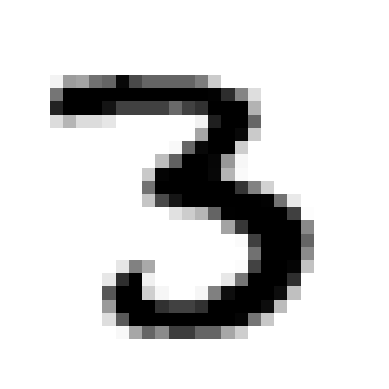

In [2]:
##Visualización
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
print("La etiqueta de esta imagen es: ", y[12])
plot_digit(X[12])

- 2.1 Escale todas las `784` variables con el método `min-max`; pero usando en máximo y el mínimo globales, en lugar de los de cada columna. Vrase el `ejercicio 0312` del capítulo 5, unidad 8 (`ensemble algorithms`).

- 2.2 Divida los datos en un conjunto de entrenamiento y un conjunto de prueba (utilizar $60.000$ registros para el entrenamiento y $10.000$ para prueba). Luego, entrene los siguientes clasificadores optimizando los `hiperparámetros` más representativos (excepto los de regularización) mediante la `validación cruzada `:

  - clasificador SVM.
  - Regresión logística
  - Naive Bayes
  - K-vecinos
  - Árbol de decisión

  Compare los rendimientos de cada uno de ellos.

- 2.3 Utilizando la combinación de hiperparámetroas más óptima para cada uno de los modelos anteriores, construya un clasificador por `voto mayoritario` tanto tipo `hard` como tipo `soft`. Elejia el más `eficiente` de los dos métodos y compare su rendimientro contra el mejor clasificador undividual del numeral anterior.

- 2.4 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `Bagging`. Compare su rendimiento con los modelos anteriores.

- 2.5 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `bosque alretorio` y utilice la validación cruzada afinar solamente un hiperparámetro: `n_estimators`. Compare su rendimiento con los modelos anteriores.

- 2.6 Utilice el `mejor modelo individual` hallado en el numeral `2.2` y contruya un clasificador con el método `AdaBoost`y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

- 2.7 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `GradientBoostingClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores.

- 2.8 Utilizando los hiperparámetros del mejor `árbol de decisión` construido en el numeral `2.2`, entrene un `XGBClassifier` y utilice la validación cruzada afinar solamente dos hiperparámetros: `n_estimators` y `learning_rate`. Compare su rendimiento con los modelos anteriores. 

- 2.9 Elija `el mejor clasificador` de entre todos los entrenados previamente y argumente su respuesta.